In [2]:
import pandas as pd  

# Load dataset
df = pd.read_csv("updated_survey_lung_cancer.csv")

# Display first few rows
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [9]:
# Summary of numerical columns
print(df.describe())



           GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.475728   62.673139    0.563107        0.569579    0.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    0.000000        0.000000    0.000000   
25%      0.000000   57.000000    0.000000        0.000000    0.000000   
50%      0.000000   62.000000    1.000000        1.000000    0.000000   
75%      1.000000   69.000000    1.000000        1.000000    1.000000   
max      1.000000   87.000000    1.000000        1.000000    1.000000   

       PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count     309.000000       309.000000  309.000000  309.000000  309.000000   
mean        0.501618         0.504854    0.673139    0.556634    0.556634   
std         0.500808         0.500787    0.469827    0.497588    0.497588   
min         0.000000         0.000

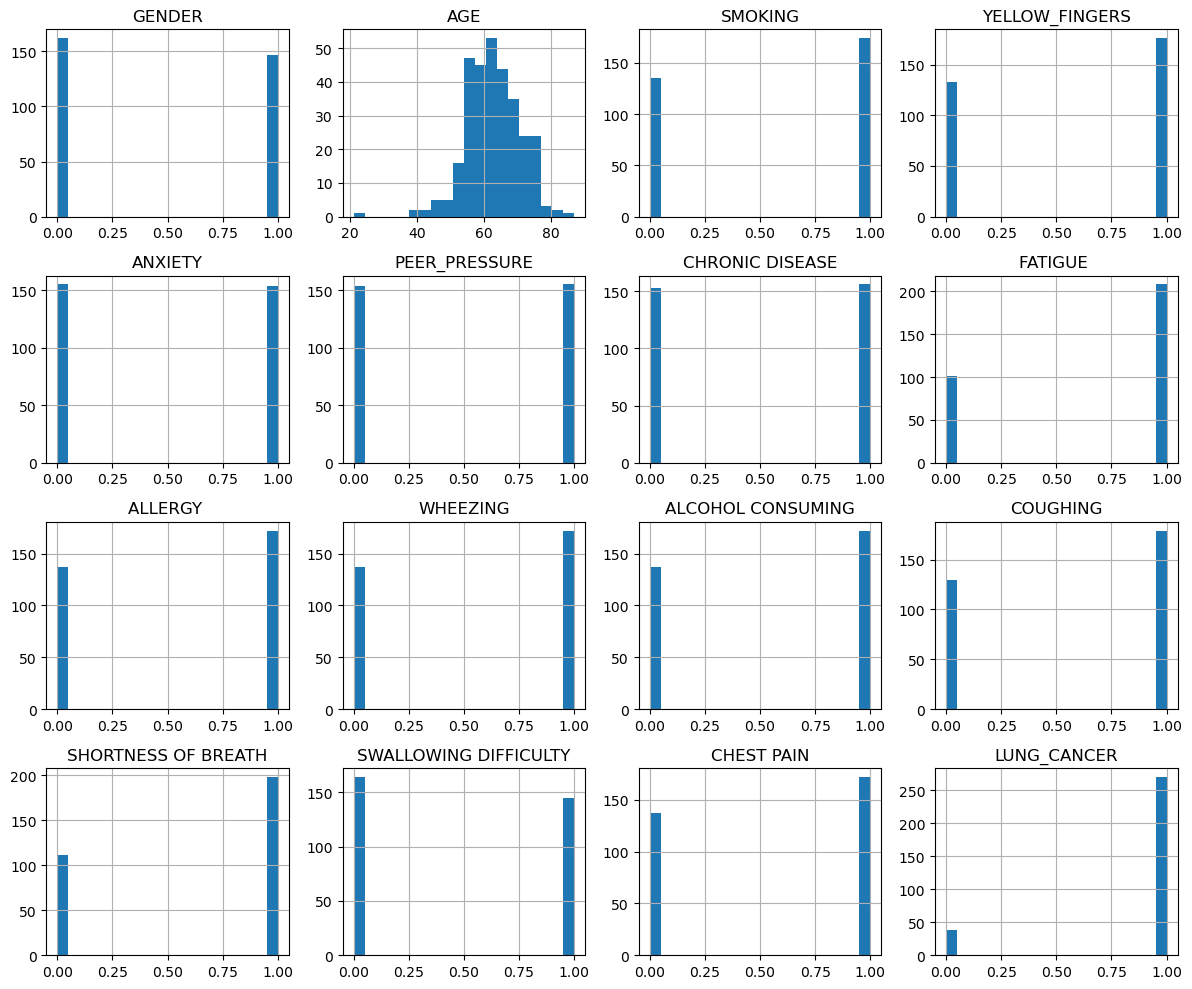

In [10]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


In [11]:
# Check for missing values
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


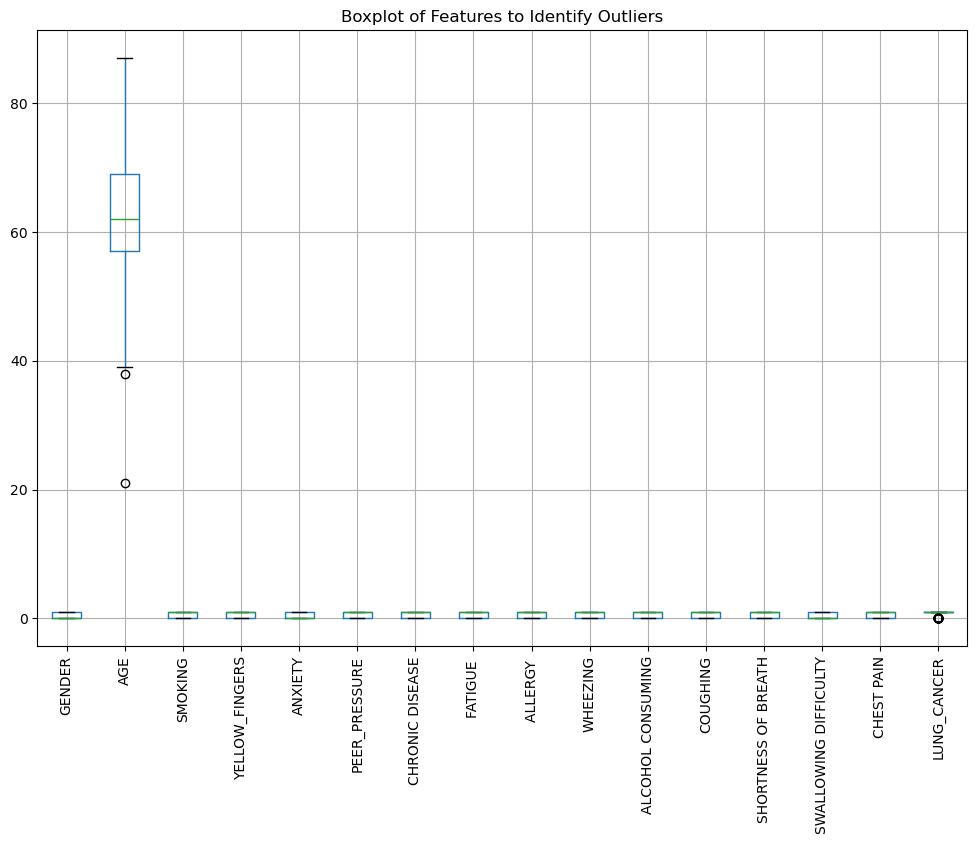

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for numerical features to detect outliers
plt.figure(figsize=(12, 8))
df.boxplot(rot=90)  # Rotate labels for readability
plt.title("Boxplot of Features to Identify Outliers")
plt.show()


In [13]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Check for unique values in categorical columns (to find inconsistencies)
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Number of duplicate rows: 33
Unique values in GENDER: [0 1]
Unique values in AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Unique values in SMOKING: [0 1]
Unique values in YELLOW_FINGERS: [1 0]
Unique values in ANXIETY: [1 0]
Unique values in PEER_PRESSURE: [0 1]
Unique values in CHRONIC DISEASE: [0 1]
Unique values in FATIGUE : [1 0]
Unique values in ALLERGY : [0 1]
Unique values in WHEEZING: [1 0]
Unique values in ALCOHOL CONSUMING: [1 0]
Unique values in COUGHING: [1 0]
Unique values in SHORTNESS OF BREATH: [1 0]
Unique values in SWALLOWING DIFFICULTY: [1 0]
Unique values in CHEST PAIN: [1 0]
Unique values in LUNG_CANCER: [1 0]


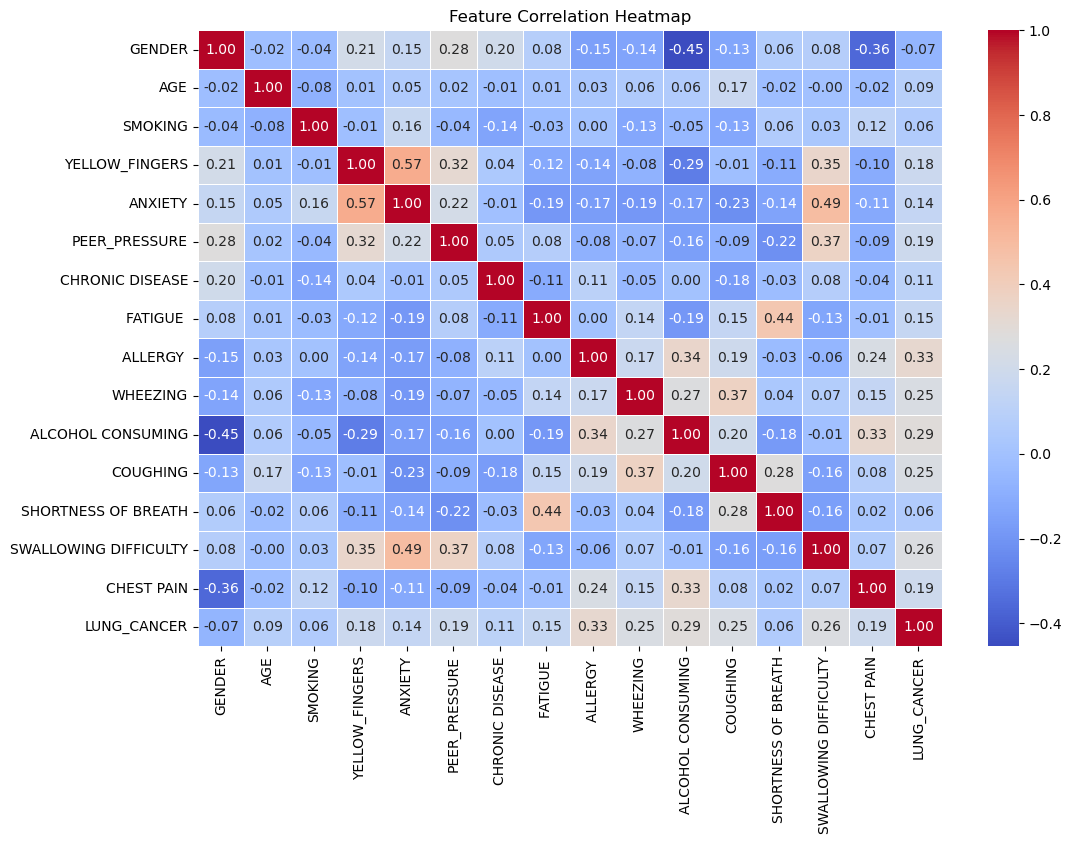

In [14]:
#A heatmap shows how strongly each feature is related to lung cancer
import numpy as np

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


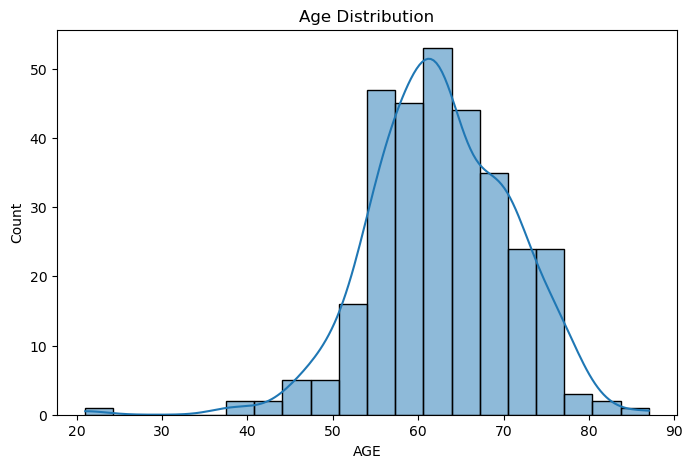

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

In [18]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [19]:
# Filling missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric missing values with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical missing values with mode
print("Missing values handled successfully!")


Missing values handled successfully!


In [22]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['AGE'] = np.where(df['AGE'] < lower_bound, lower_bound, df['AGE'])
df['AGE'] = np.where(df['AGE'] > upper_bound, upper_bound, df['AGE'])

print("Outliers handled successfully!")


Outliers handled successfully!


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to Age
df['AGE'] = scaler.fit_transform(df[['AGE']])

print("Age feature scaled successfully!")


Age feature scaled successfully!


In [25]:
print("Final dataset preview:\n", df.head())
print("Dataset summary:\n", df.info())
print("No missing values left:", df.isnull().sum().sum() == 0)


Final dataset preview:
    GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0  0.625000        0               1        1              0   
1       0  0.729167        1               0        0              0   
2       1  0.416667        0               0        0              1   
3       0  0.500000        1               1        1              0   
4       1  0.500000        0               1        0              0   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0         1         0         1                  1         1   
1                1         1         1         0                  0         0   
2                0         1         0         1                  0         1   
3                0         0         0         0                  1         0   
4                0         0         0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAI

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['LUNG_CANCER'])  # Features
y = df['LUNG_CANCER']  # Target variable

# Split the dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Dataset successfully split into training and testing sets!")


✅ Dataset successfully split into training and testing sets!


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("✅ Model training completed!")


✅ Model training completed!


In [29]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"✅ Best Hyperparameters: {best_params}")

# Train the best model
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)


✅ Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [31]:
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]  # For AUC-ROC


In [32]:
print("Predicted Class Labels:", y_pred)  # 0 or 1 for each sample
print("Predicted Probabilities for Class 1:", y_prob)  # Probability values


Predicted Class Labels: [1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]
Predicted Probabilities for Class 1: [0.98708333 0.9785119  0.92740476 0.98791667 0.14821429 0.9244881
 0.58000198 0.9856131  0.33603571 0.98860714 0.84904747 0.63750198
 0.97377579 0.81208929 0.98442857 0.98503571 0.49893834 0.22194643
 0.87735317 0.96219841 1.         0.94431151 0.80312572 0.93861508
 0.97770833 0.59258748 0.92533333 0.95137103 0.60936905 0.91508929
 0.74433787 0.98936905 0.67485913 0.99875    0.24295833 0.62219318
 0.91488294 0.97920238 0.97920238 0.99440476 0.96334524 0.63059905
 0.99178571 0.92399603 0.91766071 0.94036905 0.99325    0.93032937
 0.95137103 0.97030952 0.66544949 0.87273413 0.49244246 0.88326786
 0.99875    0.96170238 0.90230501 0.86204747 0.93119643 0.96516667
 1.         0.9655119 ]


✅ Accuracy: 0.8710
✅ Precision: 0.9107
✅ Recall: 0.9444
✅ F1-score: 0.9273
✅ AUC-ROC: 0.9444

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.91      0.94      0.93        54

    accuracy                           0.87        62
   macro avg       0.71      0.66      0.68        62
weighted avg       0.86      0.87      0.86        62



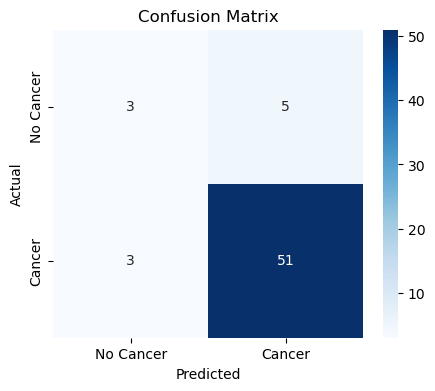

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ AUC-ROC: {auc:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cancer", "Cancer"], yticklabels=["No Cancer", "Cancer"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [34]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")  # Always predicts the majority class
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

# Evaluate Dummy Model
dummy_accuracy = accuracy_score(y_test, dummy_pred)

print(f"⚠️ Baseline Model Accuracy: {dummy_accuracy:.4f}")
print(f"🚀 Our Model Accuracy: {accuracy:.4f}")


⚠️ Baseline Model Accuracy: 0.8710
🚀 Our Model Accuracy: 0.8710


In [35]:
import joblib

# Save the trained model
joblib.dump(best_rf_model, "lung_cancer_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!
